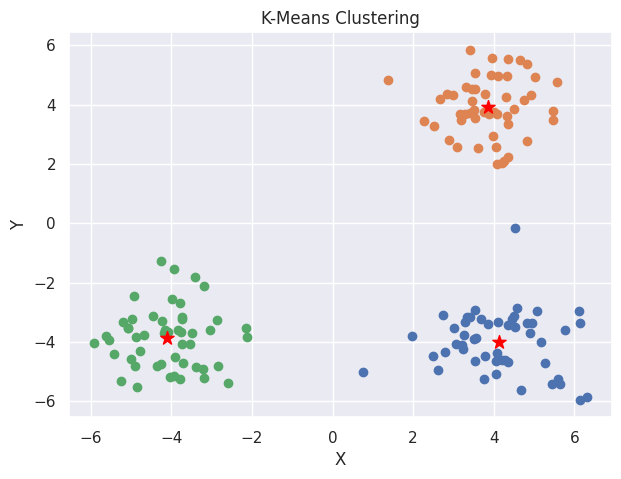

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
group1 = np.random.randn(50, 2) + np.array([4, 4])
group2 = np.random.randn(50, 2) + np.array([-4, -4])
group3 = np.random.randn(50, 2) + np.array([4, -4])
dataset = np.vstack((group1, group2, group3))

num_clusters = 3
initial_indexes = np.random.choice(dataset.shape[0], num_clusters, replace=False)
cluster_centers = dataset[initial_indexes]

def compute_distance(points, reference_points):
    return np.linalg.norm(points[:, np.newaxis] - reference_points, axis=2)

max_steps = 100
for _ in range(max_steps):
    distances = compute_distance(dataset, cluster_centers)
    assigned_labels = np.argmin(distances, axis=1)
    updated_centers = np.array([dataset[assigned_labels == idx].mean(axis=0) for idx in range(num_clusters)])

    if np.all(cluster_centers == updated_centers):
        break

    cluster_centers = updated_centers

plt.figure(figsize=(7, 5))

for cluster in range(num_clusters):
    plt.scatter(dataset[assigned_labels == cluster][:, 0], dataset[assigned_labels == cluster][:, 1])

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='*', s=100)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("K-Means Clustering")
plt.show()
